# RUN

---

### 1. Start the Environment

In [1]:
!pip -q install ./python
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import random
import matplotlib.pyplot as plt

# please do not modify the line below
env = UnityEnvironment(file_name="./Banana/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Run

Take the trained model and run it.

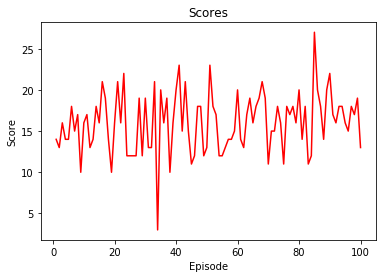

Average score: 16.03


In [3]:
env_info = env.reset(train_mode=True)[brain_name] # set train to true for faster running and easy reset.

from Agent import agent
import torch
import matplotlib.pyplot as plt

state = env_info.vector_observations[0]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

agent = agent(state_size, action_size, 0)
agent.trainingNN.load_state_dict(torch.load('model.pt'))

scores = []

for i_episode in range(1, 101):
    score = 0
    while True:
        action = agent.act(state, 0.01)
        env_info = env.step(action.astype(np.int32))[brain_name]
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores.append(score)
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment

def Average(lst):
    return sum(lst) / len(lst)

# data to be plotted
x = np.arange(1, 101) 
y = np.array(scores)
average = Average(scores)
  
# plotting
plt.title("Scores") 
plt.xlabel("Episode") 
plt.ylabel("Score") 
plt.plot(x, y, color ="red") 
plt.show()
print("Average score:", average)

env.close()